<a href="https://colab.research.google.com/github/kliang696/Bank-Churn-Analysis/blob/main/bank_churn_analysis_11/22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory data analysis and Data Cleaning

### Part 1 Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/BankChurnAnalysis/BankChurners.csv")

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### 1.1 What’s the shape of this dataset? How many features do we have in this dataset? Is there any null values?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.shape

(10127, 23)

In this dataset,it involves 23 features. we have 23 columns with 10127 rows and based on the talbe above, we don't have any null values.




#### 1.2 Is there any data that we need to remove in this dataset?

In [7]:
df = df.drop(df.columns[[-1, -2]],axis = 1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In this dataset, the last two columns are not needed, so we remove them to keep data organized and clean

#### 1.3 Shall we convert any of the categorical variables to numerical in order to get better results? 

In [8]:
df["Attrition_Flag"].replace(['Existing Customer', 'Attrited Customer'],[0, 1], inplace=True)
df["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [9]:
df["Gender"].replace(['F', 'M'],[0, 1], inplace=True)
df["Gender"].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [10]:
df['Education_Level'].replace(['Uneducated', 'High School','College','Graduate','Post-Graduate','Doctorate','Unknown'],[0, 1, 2, 3, 4,5,np.nan], inplace=True)
df['Education_Level'].value_counts(dropna=False)

3.0    3128
1.0    2013
NaN    1519
0.0    1487
2.0    1013
4.0     516
5.0     451
Name: Education_Level, dtype: int64

In [11]:
df['Education_Level'].replace([np.nan],[3], inplace=True)
df['Education_Level'].value_counts(dropna=False)

3.0    4647
1.0    2013
0.0    1487
2.0    1013
4.0     516
5.0     451
Name: Education_Level, dtype: int64

In [12]:
df["Income_Category"].replace(['Less than $40K', '$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'],[0, 1, 2, 3, 4,np.nan], inplace=True)
df['Income_Category'].value_counts(dropna=False)

0.0    3561
1.0    1790
3.0    1535
2.0    1402
NaN    1112
4.0     727
Name: Income_Category, dtype: int64

In [13]:
df["Income_Category"].replace([np.nan],[0], inplace=True)
df['Income_Category'].value_counts()

0.0    4673
1.0    1790
3.0    1535
2.0    1402
4.0     727
Name: Income_Category, dtype: int64

In [14]:
df["Card_Category"].replace(['Blue', 'Silver', 'Gold', 'Platinum'],[0, 1, 2, 3], inplace=True)
df["Card_Category"].value_counts()

0    9436
1     555
2     116
3      20
Name: Card_Category, dtype: int64

In this section, we convert all the categorical to numerical values.

### Part 2 Data Exploration for categorical data
#### CountPlot for numerical data

In [15]:
df_cat = df[['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']]

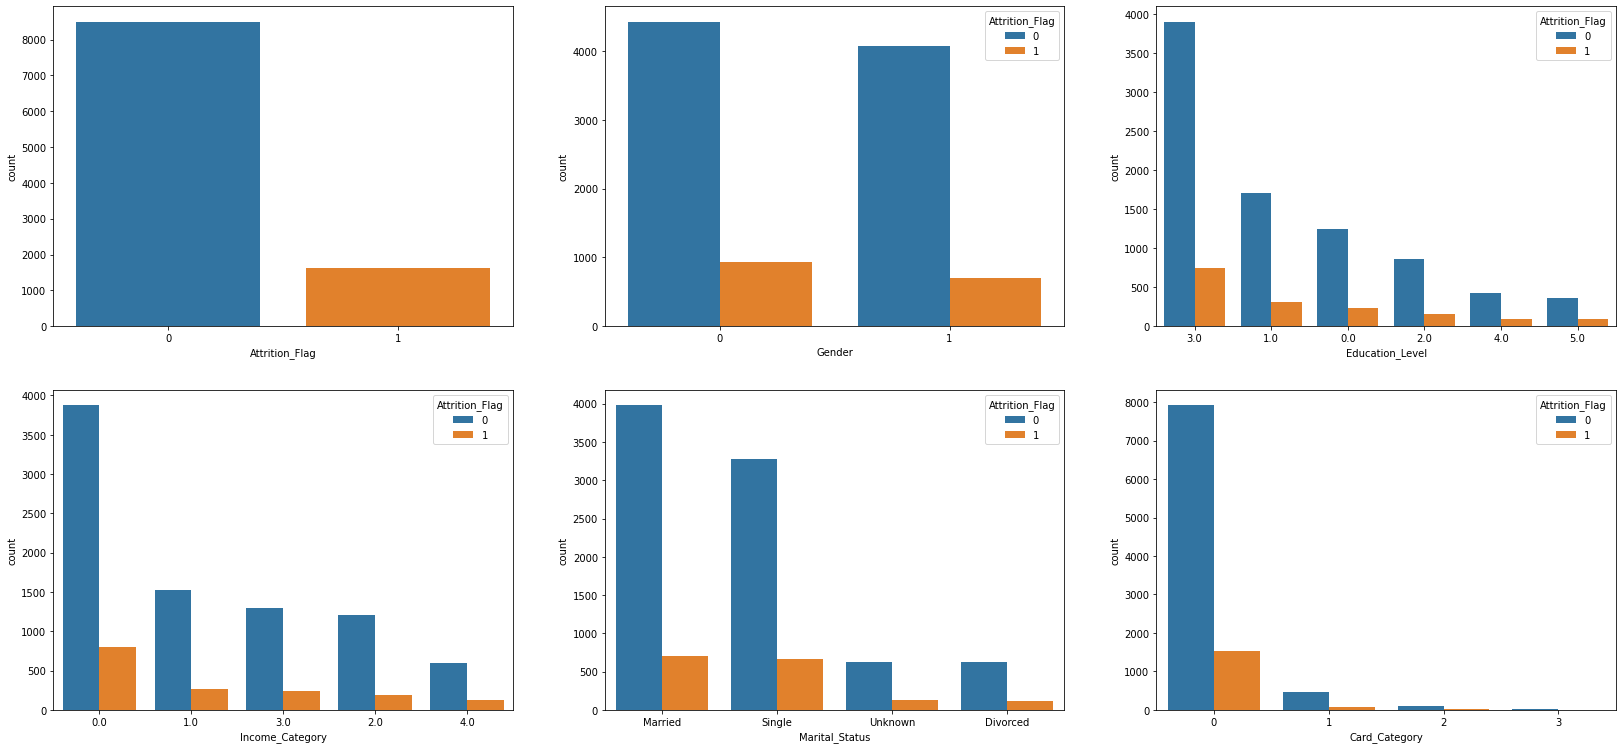

In [16]:
plt.figure(figsize=(28, 20))

plt.subplot(3,3,1)
sns.countplot(x=df["Attrition_Flag"],data=df)
plt.subplot(3,3,2)
sns.countplot(x=df["Gender"],hue="Attrition_Flag",order = df['Gender'].value_counts().index,data=df)
plt.subplot(3,3,3)
ax2 = sns.countplot(x=df["Education_Level"],hue="Attrition_Flag",order = df['Education_Level'].value_counts().index, data=df)
plt.subplot(3,3,4)
ax3 = sns.countplot(x=df["Income_Category"],hue="Attrition_Flag",order = df['Income_Category'].value_counts().index,data=df)
plt.subplot(3,3,5)
ax4 = sns.countplot(x=df["Marital_Status"],hue="Attrition_Flag",order = df['Marital_Status'].value_counts().index,data=df)
plt.subplot(3,3,6)
ax5 = sns.countplot(x=df["Card_Category"],hue="Attrition_Flag",order = df['Card_Category'].value_counts().index,data=df)




#### 2.1 For married customer vs single customer, which group has higher churn rate?

In [17]:
pd.crosstab(df["Marital_Status"],df['Attrition_Flag'],normalize=True)

Attrition_Flag,0,1
Marital_Status,,
Divorced,0.061914,0.011948
Married,0.392811,0.070011
Single,0.323393,0.065962
Unknown,0.061222,0.012738


From the table above we can tell that married customer's churn rate is 7%, which is greater than singer's churn rate 6.5%

#### 2.2 Which education level has the highest churn rate?

In [18]:
pd.crosstab(df["Education_Level"],df['Attrition_Flag'],normalize=True)

Attrition_Flag,0,1
Education_Level,,
0.0,0.123432,0.023403
1.0,0.168559,0.030216
2.0,0.084823,0.015207
3.0,0.385504,0.073368
4.0,0.041868,0.009085
5.0,0.035154,0.009381


From the crosstab above, the graduate(3) has the higherst churn rate 4.8%.

### Part 3 Data Exploration for numerical data
#### Plot histogram of numerical data

In [19]:
df_num = df[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

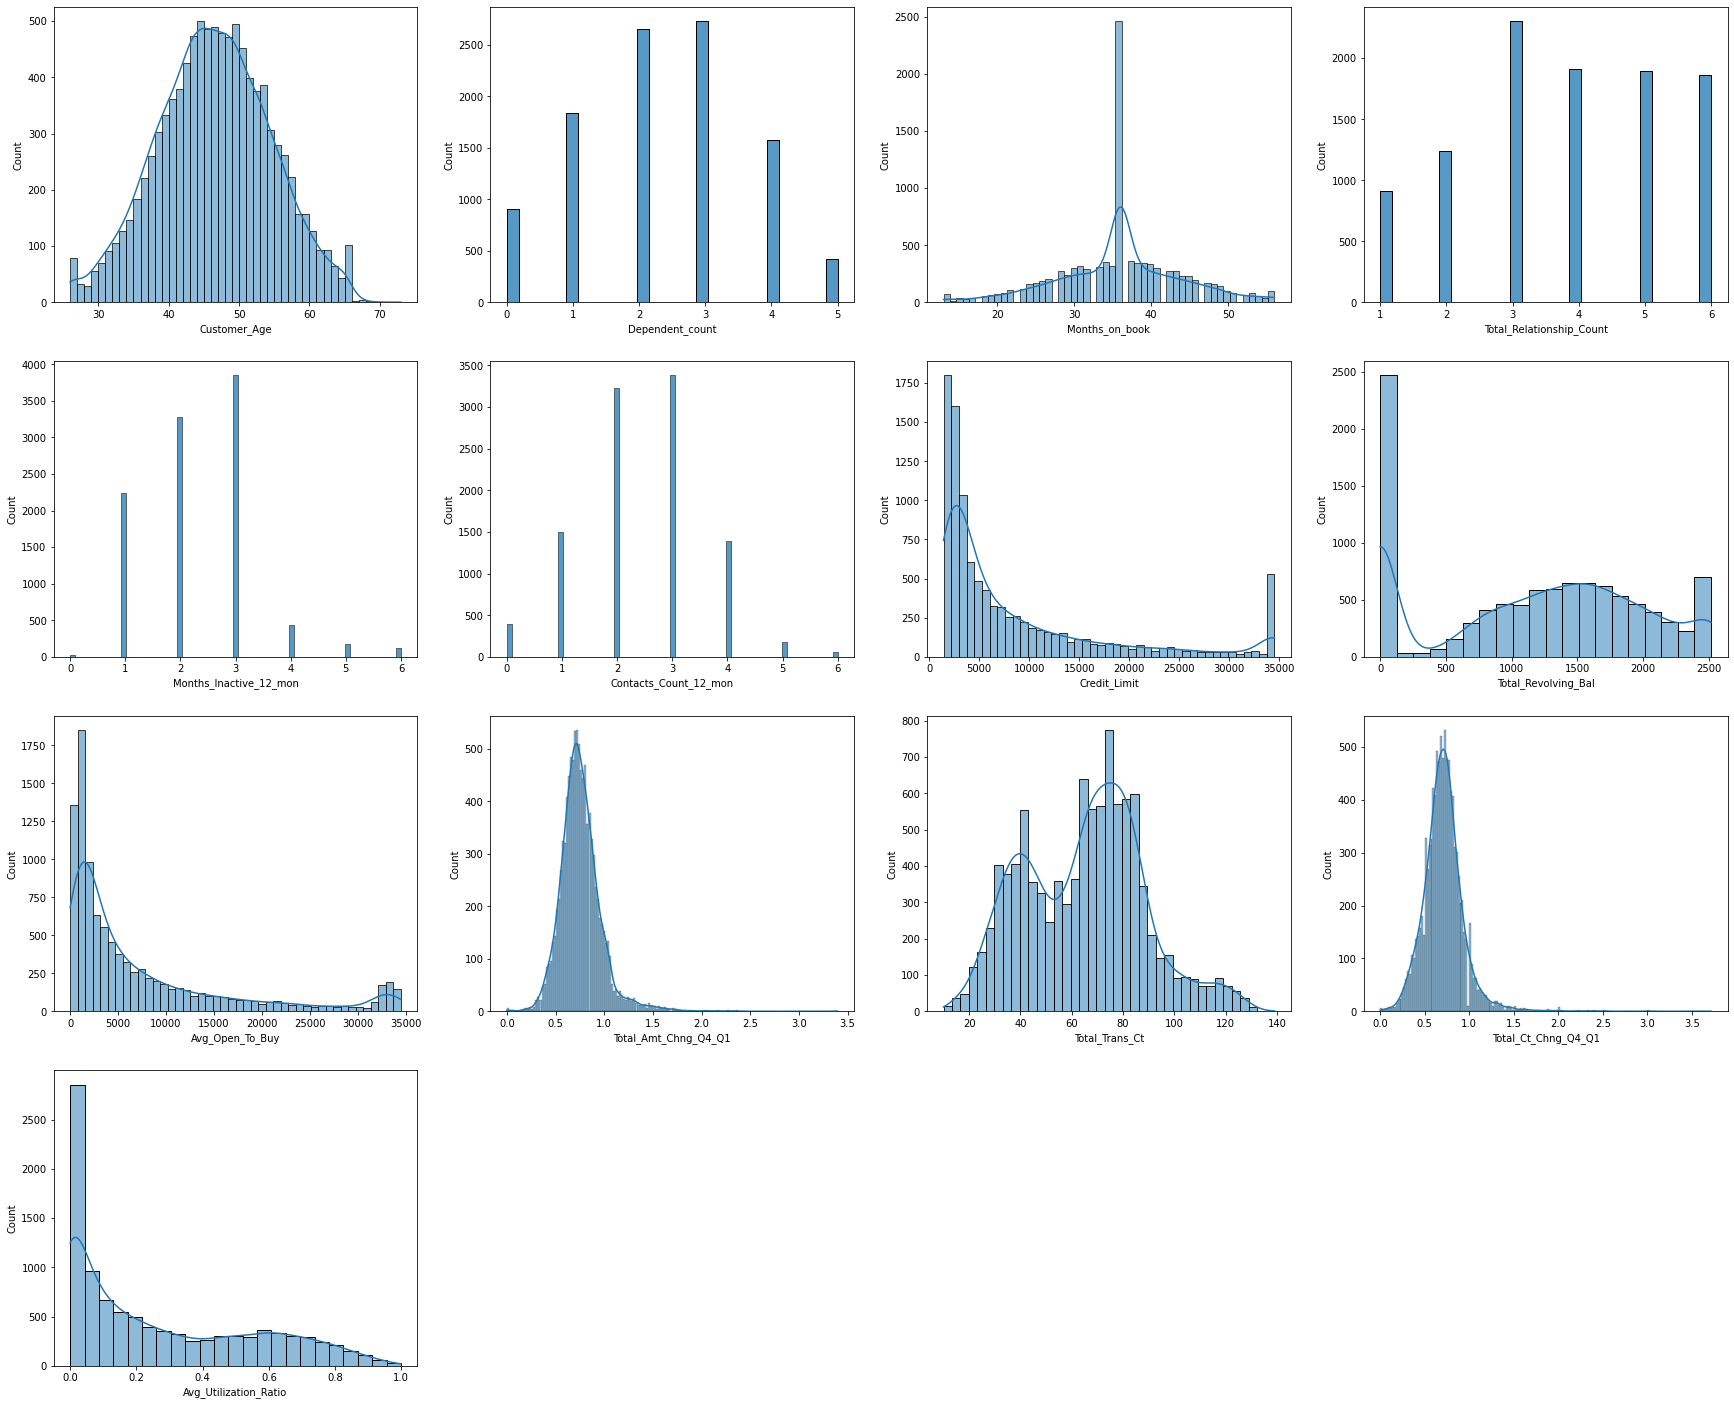

In [20]:
plt.figure(figsize=(30, 25))

plt.subplot(4,4,1)
sns.histplot(x=df_num["Customer_Age"],kde=True,data=df)
plt.subplot(4,4,2)
sns.histplot(x=df_num["Dependent_count"],kde=False,data=df)
plt.subplot(4,4,3)
sns.histplot(x=df_num["Months_on_book"],kde=True,data=df)
plt.subplot(4,4,4)
sns.histplot(x=df_num["Total_Relationship_Count"],kde=False,data=df)
plt.subplot(4,4,5)
sns.histplot(x=df_num["Months_Inactive_12_mon"],kde=False,data=df)
plt.subplot(4,4,6)
sns.histplot(x=df_num["Contacts_Count_12_mon"],kde=False,data=df)
plt.subplot(4,4,7)
sns.histplot(x=df_num["Credit_Limit"],kde=True,data=df)
plt.subplot(4,4,8)
sns.histplot(x=df_num["Total_Revolving_Bal"],kde=True,data=df)
plt.subplot(4,4,9)
sns.histplot(x=df_num["Avg_Open_To_Buy"],kde=True,data=df)
plt.subplot(4,4,10)
sns.histplot(x=df_num["Total_Amt_Chng_Q4_Q1"],kde=True,data=df)
plt.subplot(4,4,11)
sns.histplot(x=df_num["Total_Trans_Ct"],kde=True,data=df)
plt.subplot(4,4,12)
sns.histplot(x=df_num["Total_Ct_Chng_Q4_Q1"],kde=True,data=df)
plt.subplot(4,4,13)
sns.histplot(x=df_num["Avg_Utilization_Ratio"],kde=True,data=df)


#### 3.1 Is there any outliers in any of these features in this dataset?

From the histograms above, we do not notice any outliers.

#### 3.2 Heatmap for numerical data

In [21]:
df_num["Flag"]=df['Attrition_Flag']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


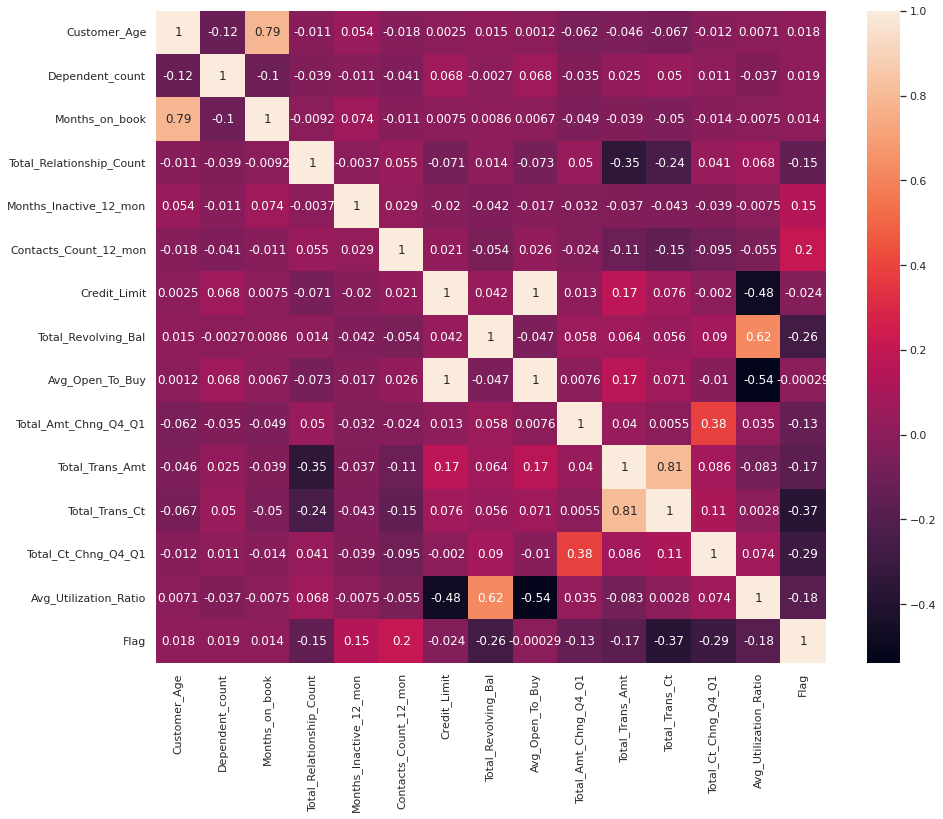

In [22]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(df_num.corr(),annot=True)

#### 3.3 What are the top 5 features that most correlated on churn?

Based on the heat map above, the top 3 featreus with the highest correaltion numbers are: 


*   Total_Trans_ct
*   Total_Ct_Chng_Q4_Q1
*   Total_Revolving_Bal
*   Avg_Utilization_Ratio
*   Total_Trans_Amt






#Feature Enginearing

In [23]:
df["Recolving_Bal_Per_Relationship"]=df["Total_Revolving_Bal"]/df["Total_Relationship_Count"]

In [24]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship
0,768805383,0,45,1,3,1.0,Married,2.0,0,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,155.4
1,818770008,0,49,0,5,3.0,Single,0.0,0,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,144.0
2,713982108,0,51,1,3,3.0,Married,3.0,0,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0
3,769911858,0,40,0,4,1.0,Unknown,0.0,0,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,839.0
4,709106358,0,40,1,3,0.0,Married,2.0,0,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0


In [25]:
df1 = pd.get_dummies(df, columns=['Marital_Status'],drop_first=True,prefix='Is')
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship,Is_Married,Is_Single,Is_Unknown
0,768805383,0,45,1,3,1.0,2.0,0,39,5,...,11914.0,1.335,1144,42,1.625,0.061,155.4,1,0,0
1,818770008,0,49,0,5,3.0,0.0,0,44,6,...,7392.0,1.541,1291,33,3.714,0.105,144.0,0,1,0
2,713982108,0,51,1,3,3.0,3.0,0,36,4,...,3418.0,2.594,1887,20,2.333,0.000,0.0,1,0,0
3,769911858,0,40,0,4,1.0,0.0,0,34,3,...,796.0,1.405,1171,20,2.333,0.760,839.0,0,0,1
4,709106358,0,40,1,3,0.0,2.0,0,21,5,...,4716.0,2.175,816,28,2.500,0.000,0.0,1,0,0


# Model1: Logistic Regression 

## Import packages

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_validate
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split


In [27]:
X = df1.iloc[:,2:] # Features
y = df1["Attrition_Flag"] # Target variable

## split without random sampling

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## under sampling

In [62]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train, y_train)
y_res.value_counts()


0    1104
1    1104
Name: Attrition_Flag, dtype: int64

In [63]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_res, y_res, test_size=0.3, random_state=22)

## over sampling

In [64]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy=1) # String
X_res1, y_res1 = ros.fit_resample(X_train, y_train)
y_res1.value_counts()

0    5984
1    5984
Name: Attrition_Flag, dtype: int64

In [72]:
y_res1.shape,X_res1.shape

((11968,), (11968, 22))

In [65]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res1, y_res1, test_size=0.3, random_state=22)

## build model

In [66]:
logreg = LogisticRegression(max_iter=1000,solver="liblinear")
logreg.fit(X_train_os, y_train_os)

LogisticRegression(max_iter=1000, solver='liblinear')

In [67]:
y_pred_org = logreg.predict(X_test)

y_score_logreg_org = logreg.predict_proba(X_test)[:, 1]


In [68]:
y_pred = logreg.predict(X_test_os)

y_score_logreg = logreg.predict_proba(X_test_os)[:, 1]

In [69]:
y_score_logreg_train = logreg.predict_proba(X_train_os)[:, 1]

## Confusion Matrix

In [36]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test_os, y_pred)
cnf_matrix

array([[2211,  307],
       [ 374, 1443]])

## Classification Report

In [37]:
print(classification_report(y_test_os, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2518
           1       0.82      0.79      0.81      1817

    accuracy                           0.84      4335
   macro avg       0.84      0.84      0.84      4335
weighted avg       0.84      0.84      0.84      4335



## Precision Recall Curve

In [42]:
ap_train_list=[]
ap_test_list=[]
for i in range(1,11):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i*10)
  logreg = LogisticRegression(max_iter=1000,solver="liblinear")
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  y_score_logreg_train = logreg.predict_proba(X_train)[:, 1]
  y_score_logreg = logreg.predict_proba(X_test)[:, 1]

  ap_train=np.round(average_precision_score(y_train, y_score_logreg_train),3)
  ap_train_list.append(ap_train)
  
  ap_test=np.round(average_precision_score(y_test, y_score_logreg),3)
  ap_test_list.append(ap_test)

log_ap_df=pd.DataFrame({"ap_train":ap_train_list,"ap_test":ap_test_list})
log_ap_df.head(10)




,ap_train,ap_test
0,0.736,0.714
1,0.736,0.736
2,0.706,0.737
3,0.706,0.679
4,0.723,0.716
5,0.689,0.753
6,0.705,0.701
7,0.751,0.719
8,0.725,0.714
9,0.707,0.736


In [45]:
ap_train_list=[]
ap_test_list=[]
for i in range(1,11):
  X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_res, y_res, test_size=0.3, random_state=i*10)
  logreg = LogisticRegression(max_iter=1000,solver="liblinear")
  logreg.fit(X_train_us, y_train_us)
  y_pred = logreg.predict(X_test)
  y_score_logreg_train = logreg.predict_proba(X_train_us)[:, 1]
  y_score_logreg = logreg.predict_proba(X_test)[:, 1]

  ap_train=np.round(average_precision_score(y_train_us, y_score_logreg_train),3)
  ap_train_list.append(ap_train)
  
  ap_test=np.round(average_precision_score(y_test, y_score_logreg),3)
  ap_test_list.append(ap_test)

log_ap_df=pd.DataFrame({"ap_train":ap_train_list,"ap_test":ap_test_list})
log_ap_df.head(10)

,ap_train,ap_test
0,0.869,0.713
1,0.880,0.737
2,0.880,0.740
3,0.868,0.736
4,0.877,0.725
5,0.867,0.740
6,0.870,0.714
7,0.877,0.735
8,0.883,0.733
9,0.871,0.722


In [54]:
y_pred.shape

(3039,)

In [56]:
y_test_os.shape

(4335,)

In [57]:
y_train_os.shape

(10115,)

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
ap_train_list=[]
ap_test_list=[]
for i in range(1,11):
  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res1, y_res1, test_size=0.3, random_state=i*10)
  logreg = LogisticRegression(max_iter=1000,solver="liblinear")
  logreg.fit(X_train_os, y_train_os)
  
  y_pred_test = logreg.predict(X_test_os)
  y_pred_train = logreg.predict(X_train_os)
  
  y_score_logreg_train = logreg.predict_proba(X_train_os)[:, 1]
  y_score_logreg = logreg.predict_proba(X_test_os)[:, 1]

  ap_train=np.round(accuracy_score(y_train_os, y_pred_train),3)
  ap_train_list.append(ap_train)
  
  ap_test=np.round(accuracy_score(y_test_os, y_pred_test),3)
  ap_test_list.append(ap_test)

log_ap_df=pd.DataFrame({"ap_train":ap_train_list,"ap_test":ap_test_list})
log_ap_df.head(10)

,ap_train,ap_test
0,0.858,0.850
1,0.853,0.852
2,0.851,0.849
3,0.852,0.857
4,0.857,0.843
5,0.854,0.848
6,0.851,0.854
7,0.850,0.852
8,0.856,0.848
9,0.846,0.842


In [43]:
def myplot(y_actual, y_score,mylabel):
  ap_train=np.round(average_precision_score(y_actual, y_score),3)

  precision, recall, thresholds = precision_recall_curve(y_actual, y_score)

  #create precision recall curve
  #fig, ax = plt.subplots()
  ax=sns.lineplot(recall, precision,label=mylabel)

  #ax.text(0.7, 0.2,'ap=' + str(ap_train) , fontsize=15) 
  #add axis labels to plot
  ax.set_title('Precision-Recall Curve')
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')

  #display plot
  #plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,ap_train,ap_test
0,0.731,0.732
1,0.706,0.737


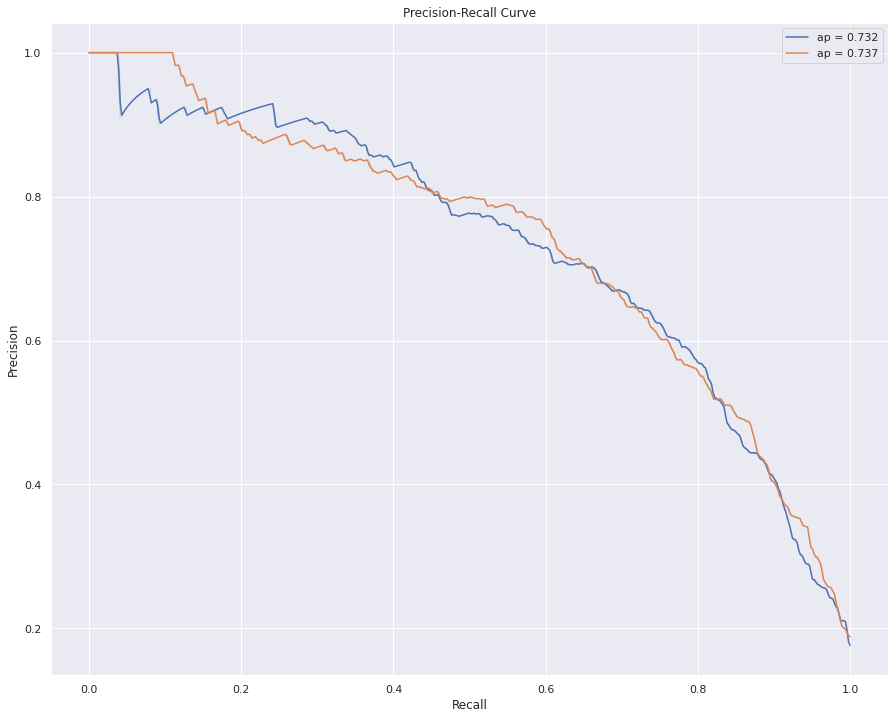

In [ ]:
ap_train_list=[]
ap_test_list=[]
for i in range(1,3):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i*15)
  logreg = LogisticRegression(max_iter=1000,solver="liblinear")
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  y_score_logreg_train = logreg.predict_proba(X_train)[:, 1]
  y_score_logreg = logreg.predict_proba(X_test)[:, 1]

  ap_train=np.round(average_precision_score(y_train, y_score_logreg_train),3)
  ap_train_list.append(ap_train)
  
  ap_test=np.round(average_precision_score(y_test, y_score_logreg),3)
  ap_test_list.append(ap_test)

  myplot(y_test, y_score_logreg,"ap = " +str(ap_test))
 

log_ap_df=pd.DataFrame({"ap_train":ap_train_list,"ap_test":ap_test_list})
log_ap_df.head(10)

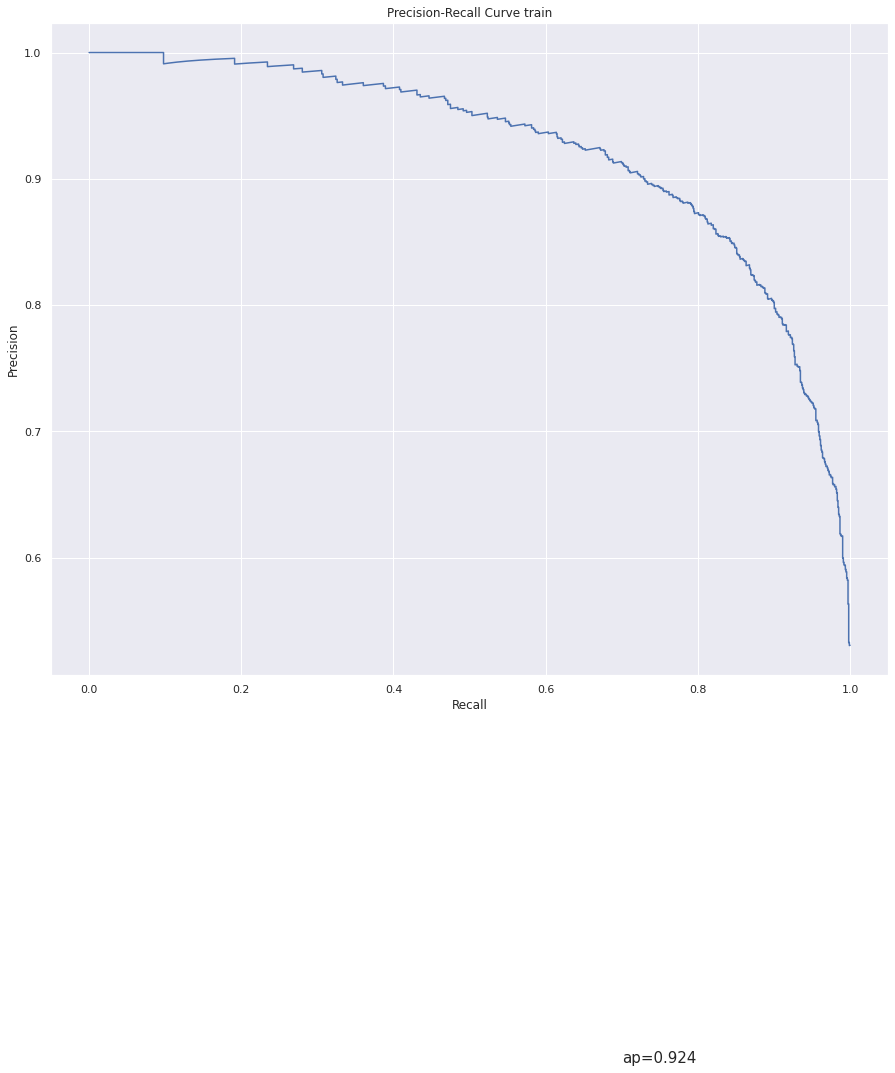

In [ ]:
ap_train=np.round(average_precision_score(y_train, y_score_logreg_train),3)

precision, recall, thresholds = precision_recall_curve(y_train, y_score_logreg_train)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.text(0.7, 0.2,'ap=' + str(ap_train) , fontsize=15) 
#add axis labels to plot
ax.set_title('Precision-Recall Curve train')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
def myplot(y_actual, y_score):
  ap_train=np.round(average_precision_score(y_actual, y_score),3)

  precision, recall, thresholds = precision_recall_curve(y_actual, y_score)

  #create precision recall curve
  fig, ax = plt.subplots()
  ax.plot(recall, precision)

  ax.text(0.7, 0.2,'ap=' + str(ap_train) , fontsize=15) 
  #add axis labels to plot
  ax.set_title('Precision-Recall Curve train')
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')

  #display plot
  plt.show()


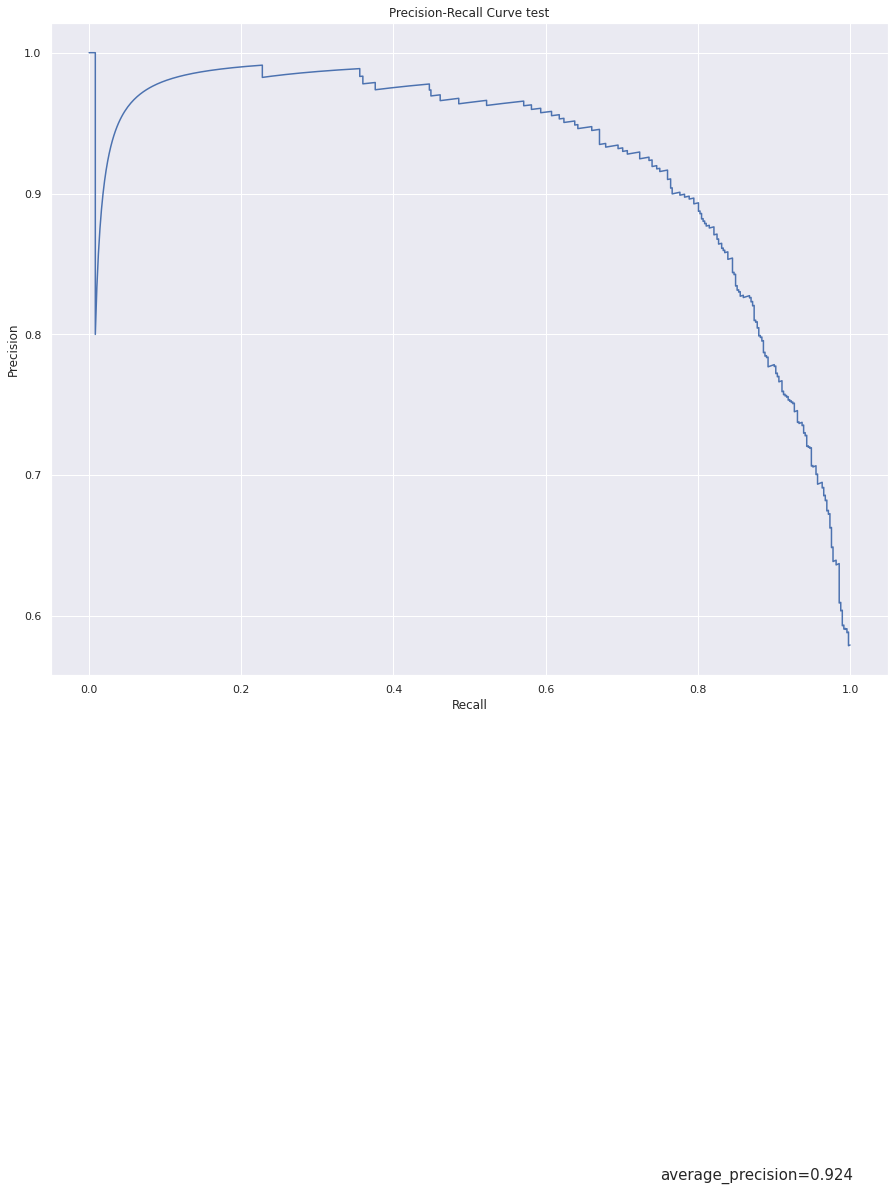

In [ ]:
ap_test=np.round(average_precision_score(y_test, y_score_logreg),3)
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score_logreg)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.text(0.75, 0.2,'average_precision=' + str(ap_test) , fontsize=15) 
#add axis labels to plot
ax.set_title('Precision-Recall Curve test')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## ROC-AUC Curve

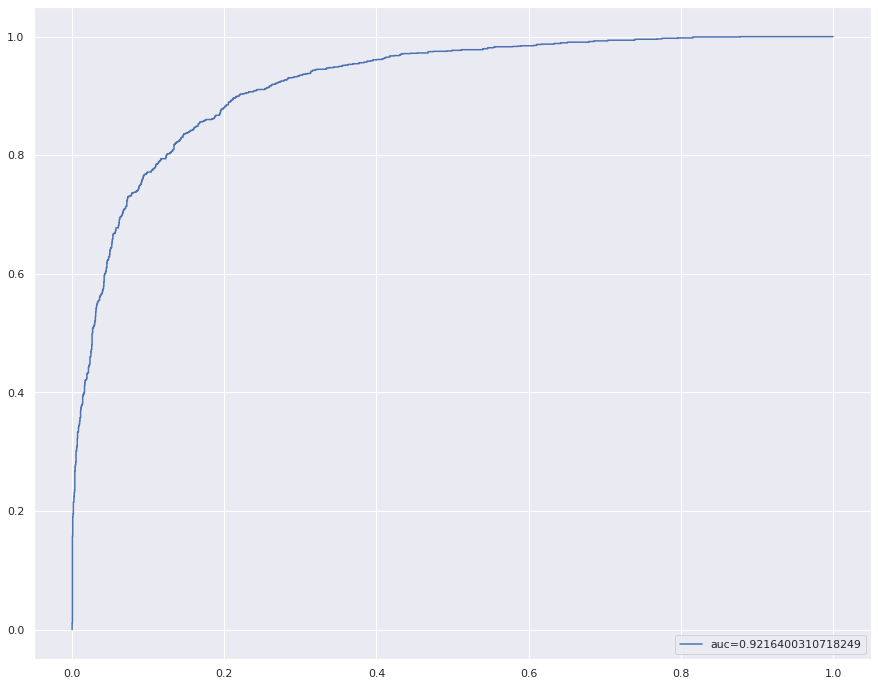

In [38]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test_os,  y_score_logreg)
#create ROC curve
auc = metrics.roc_auc_score(y_test_os, y_score_logreg)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Feature Importance

In [39]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [40]:
results = permutation_importance(logreg, X_test_os, y_test_os, scoring='accuracy')

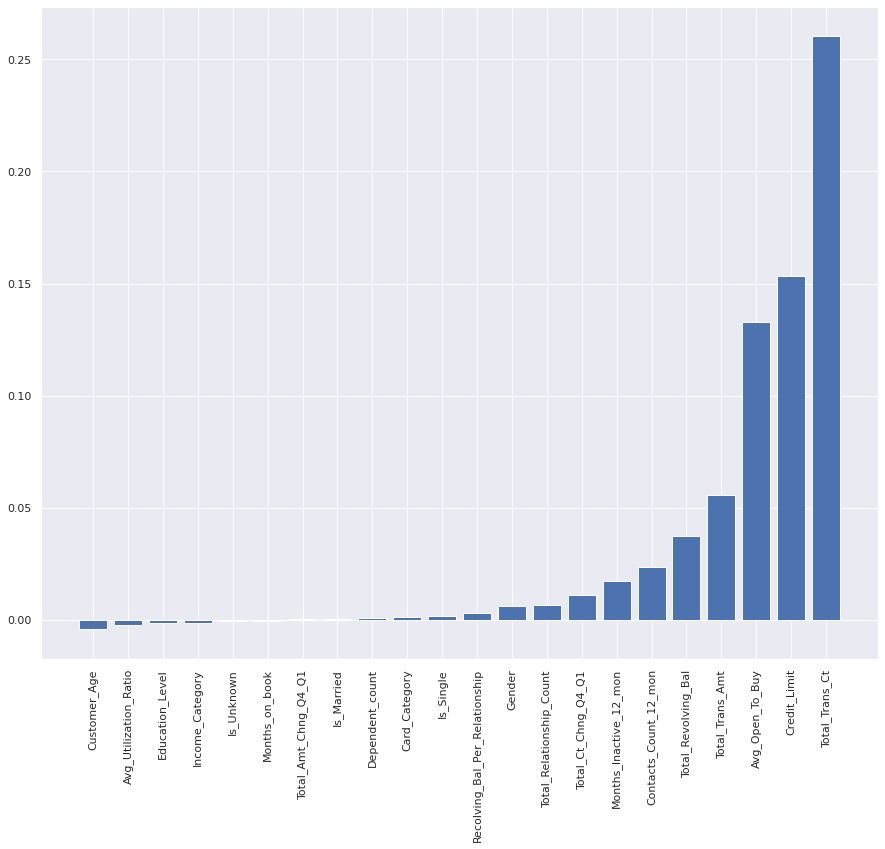

In [41]:

df_plot=pd.DataFrame({"features":X_test_us.columns,"importance":results.importances_mean})
df_plot_sorted=df_plot.sort_values(by='importance')


pyplot.bar(df_plot_sorted["features"],df_plot_sorted["importance"])
pyplot.xticks(rotation='vertical')
pyplot.show()

## K-Fold Cross Validation

In [ ]:
scores_log_reg = cross_validate(logreg, X_res1, y_res1, cv=10,
                         scoring=('accuracy'),
                         return_train_score=True)
print(scores_log_reg['train_score'])

print(scores_log_reg['test_score'])

df_scores_log = pd.DataFrame({'train_score':scores_log_reg['train_score'],'test_score':scores_log_reg['test_score']})

[0.84721261 0.84436755 0.84782776 0.83467897 0.83360246 0.84252211
 0.83844675 0.84190696 0.84590542 0.84582853]
[0.65121107 0.69480969 0.73287197 0.82283737 0.88304498 0.90034602
 0.8899654  0.89411765 0.87266436 0.47058824]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


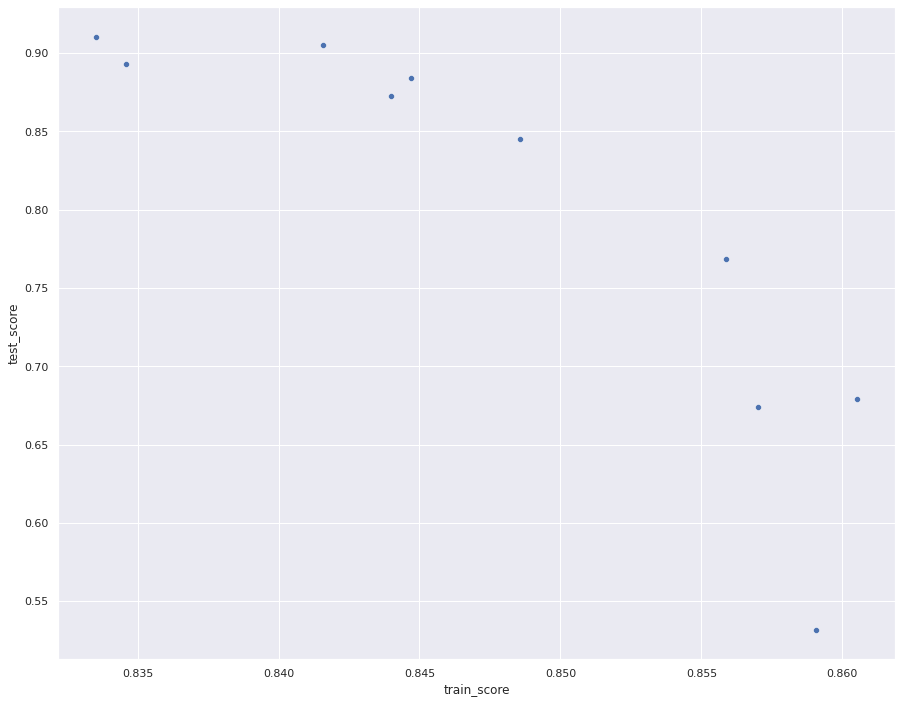

In [ ]:
sns.scatterplot(df_scores_log['train_score'],df_scores_log['test_score'])

# Pickling the model

In [ ]:
import pickle


In [ ]:
pickle.dump(logreg,open('logreg.pkl', 'wb'))


In [ ]:
picked_model = pickle.load(open('logreg.pkl','rb'))


In [ ]:
picked_model.predict(X_test)

In [ ]:
X_test.head()

# Model 2: Random Forest Classfier

## Build Model

In [79]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=15)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train_os,y_train_os)

y_pred=rfc.predict(X_test)

y_pred_proba_rfc = rfc.predict_proba(X_test)[::,1]

y_pred_proba_rfc_train = rfc.predict_proba(X_train)[::,1]

## Confusion Matrix

In [ ]:
rfc_matrix = metrics.confusion_matrix(y_test, y_pred)
rfc_matrix

array([[1701,   16],
       [   0,  309]])

## Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1717
           1       0.95      1.00      0.97       309

    accuracy                           0.99      2026
   macro avg       0.98      1.00      0.99      2026
weighted avg       0.99      0.99      0.99      2026



## Precision Recall Curve

In [83]:
ap_train_list_rfc=[]
ap_test_list_rfc=[]
for i in range(1,20):
  X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=i*10)
  rfc=RandomForestClassifier(n_estimators=5,max_depth=3,criterion="entropy")
  rfc.fit(X_train, y_train)
  
  y_pred = rfc.predict(X_test)
  y_score_logreg_train = rfc.predict_proba(X_train)[:, 1]
  y_score_logreg = rfc.predict_proba(X_test)[:, 1]

  ap_train=np.round(average_precision_score(y_train, y_score_logreg_train),3)
  ap_train_list_rfc.append(ap_train)
  
  ap_test=np.round(average_precision_score(y_test, y_score_logreg),3)
  ap_test_list_rfc.append(ap_test)

rfc_ap_df=pd.DataFrame({"ap_train":ap_train_list_rfc,"ap_test":ap_test_list_rfc})
rfc_ap_df.head(20)


,ap_train,ap_test
0,0.916,0.902
1,0.929,0.914
2,0.920,0.924
3,0.916,0.895
4,0.903,0.886
5,0.896,0.887
6,0.912,0.911
7,0.924,0.908
8,0.906,0.876
9,0.902,0.894


In [87]:
from sklearn.metrics import roc_auc_score
ap_train_list_rfc=[]
ap_test_list_rfc=[]
for i in range(1,20):
  X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=i*10)
  rfc=RandomForestClassifier(n_estimators=5,max_depth=3,criterion="entropy")
  rfc.fit(X_train, y_train)
  
  y_pred = rfc.predict(X_test)
  y_pred_train = rfc.predict(X_train)


  y_score_logreg_train = rfc.predict_proba(X_train)[:, 1]
  y_score_logreg = rfc.predict_proba(X_test)[:, 1]

  ap_train=np.round(metrics.roc_auc_score(y_train,y_score_logreg_train ),3)
  ap_train_list_rfc.append(ap_train)
  
  ap_test=np.round(metrics.roc_auc_score(y_test, y_score_logreg),3)
  ap_test_list_rfc.append(ap_test)

rfc_ap_df=pd.DataFrame({"roc_auc_train":ap_train_list_rfc,"roc_auc_test":ap_test_list_rfc})
rfc_ap_df.head(20)

,roc_auc_train,roc_auc_test
0,0.922,0.906
1,0.905,0.912
2,0.910,0.914
3,0.916,0.876
4,0.938,0.919
5,0.928,0.905
6,0.932,0.919
7,0.907,0.877
8,0.918,0.905
9,0.928,0.904


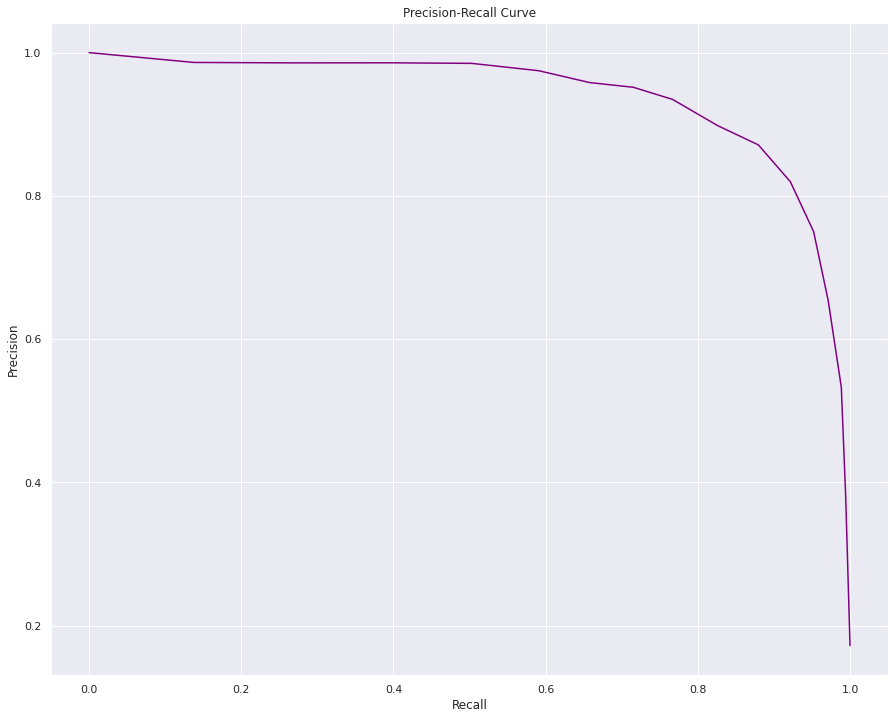

In [ ]:
from sklearn.metrics import precision_recall_curve
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_rfc)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## ROC-AUC Curve

In [ ]:
#define metrics

fpr, tpr, _ = metrics.roc_curve(y_train_os,  y_pred_proba_rfc_train)
#create ROC curve
auc = metrics.roc_auc_score(y_train_os, y_pred_proba_rfc_train)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ValueError: ignored

## Feature Importance

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train_os.columns,
    'Importance': rfc.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

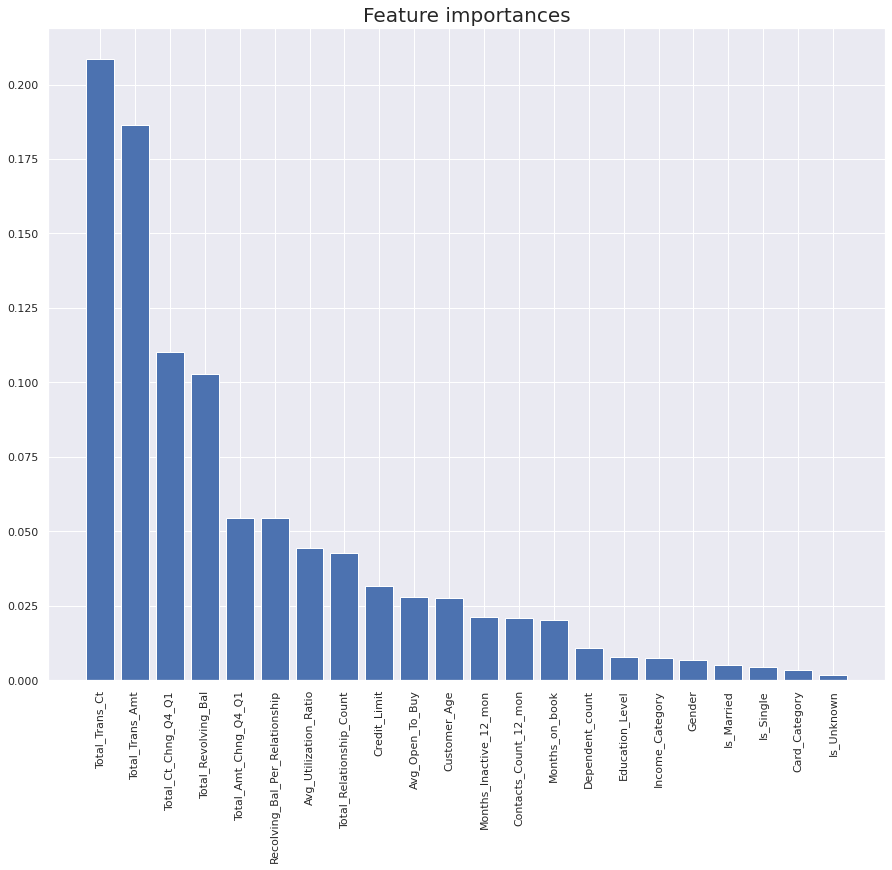

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances', size=20)
plt.xticks(rotation='vertical')
plt.show()

## K-Fold cross validation

In [ ]:
from sklearn.model_selection import cross_validate
scores_rfc = cross_validate(rfc, X_res, y_res, cv=10,
                         scoring=('roc_auc'),
                         return_train_score=True)
print(scores_rfc['train_score'])

print(scores_rfc['test_score'])

df_scores_rfc = pd.DataFrame({'train_score':scores_rfc['train_score'],'test_score':scores_rfc['test_score']})


[0.9993552  0.99940512 0.99947464 0.99877875 0.99921297 0.99937709
 0.99928733 0.99837161 0.99931834 0.99940739]
[0.90246152 0.95713049 0.96896759 0.9782265  0.96529198 0.95582443
 0.98932061 0.97848974 0.86999167 0.85399152]


In [ ]:
df_scores_rfc.head(10)

In [ ]:
sns.scatterplot(df_scores_rfc['train_score'],df_scores_rfc['test_score'])

# Model 3: XG Boost

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res1, y_res1 = ros.fit_resample(X, y)
y_res1.value_counts()

0    8500
1    8500
Name: Attrition_Flag, dtype: int64

In [ ]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res1, y_res1, test_size=0.3, random_state=22)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()


In [ ]:
XGB.fit(X_train_os,y_train_os)

y_pred=XGB.predict(X_test3)

y_pred_proba_XGB = XGB.predict_proba(X_test3)[::, 1]

y_pred_proba_XGB_train = XGB.predict_proba(X_train3)[::, 1]


## Confusion Matrix

In [ ]:
XGB_matrix = metrics.confusion_matrix(y_test3, y_pred)
XGB_matrix

array([[2390,  138],
       [  15,  496]])

## classication report

In [ ]:
print(classification_report(y_test3, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2528
           1       0.78      0.97      0.87       511

    accuracy                           0.95      3039
   macro avg       0.89      0.96      0.92      3039
weighted avg       0.96      0.95      0.95      3039



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred))

Accuracy: 0.9496544916090819


In [ ]:
average_precision_score(y_test3, y_pred_proba_XGB)

0.9648058676944105

## Precision-Recall Curve

In [ ]:
ap_train_list_xgb=[]
ap_test_list_xgb=[]
for i in range(1,3):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i*15)
  XGB = XGBClassifier()
  XGB.fit(X_train, y_train)
  
  y_pred = XGB.predict(X_test)
  y_score_xgb_train = XGB.predict_proba(X_train)[:, 1]
  y_score_xgb = XGB.predict_proba(X_test)[:, 1]

  ap_train=np.round(average_precision_score(y_train, y_score_xgb_train),3)
  ap_train_list_xgb.append(ap_train)
  
  ap_test=np.round(average_precision_score(y_test, y_score_xgb),3)
  ap_test_list_xgb.append(ap_test)

  myplot(y_test, y_score_logreg,"ap = " +str(ap_test))
  ax.legend()

XGB_ap_df=pd.DataFrame({"ap_train":ap_train_list_xgb,"ap_test":ap_test_list_xgb})
XGB_ap_df.head(10)

TypeError: ignored

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_train,  y_score_xgb_train)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision)

#add axis labels to plot
ax.set_title('Precision-Recall Curve for trainning')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')


ax.text(0.9, 0.55,'ap=' + str(ap_train) , fontsize=15) 

#display plot
plt.show()

## ROC-AUC curve

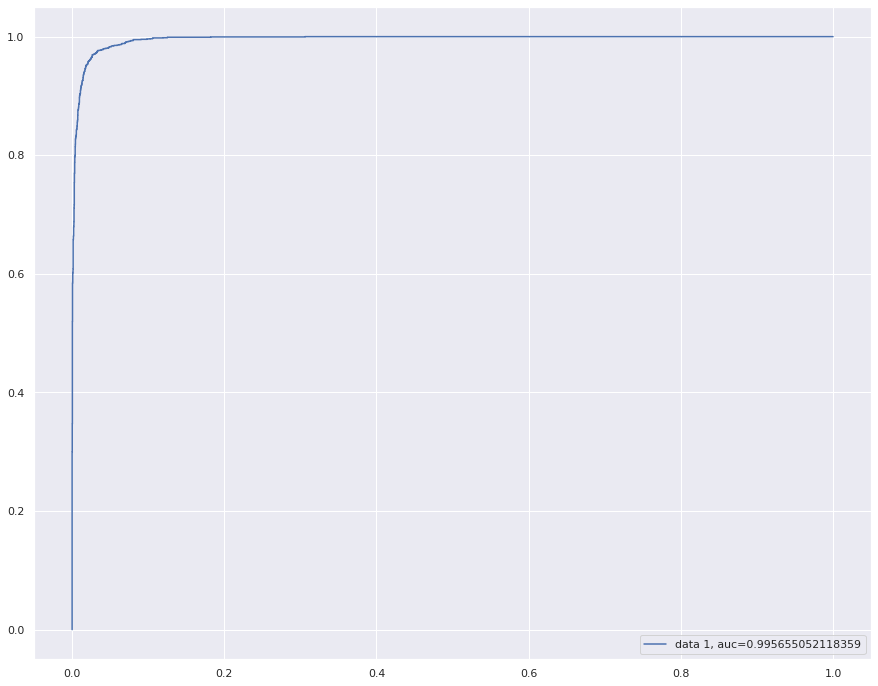

In [ ]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_train1,  y_pred_proba_XGB_train)
#create ROC curve
auc = metrics.roc_auc_score(y_train1, y_pred_proba_XGB_train)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Feature Importance

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train1.columns,
    'Importance': XGB.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

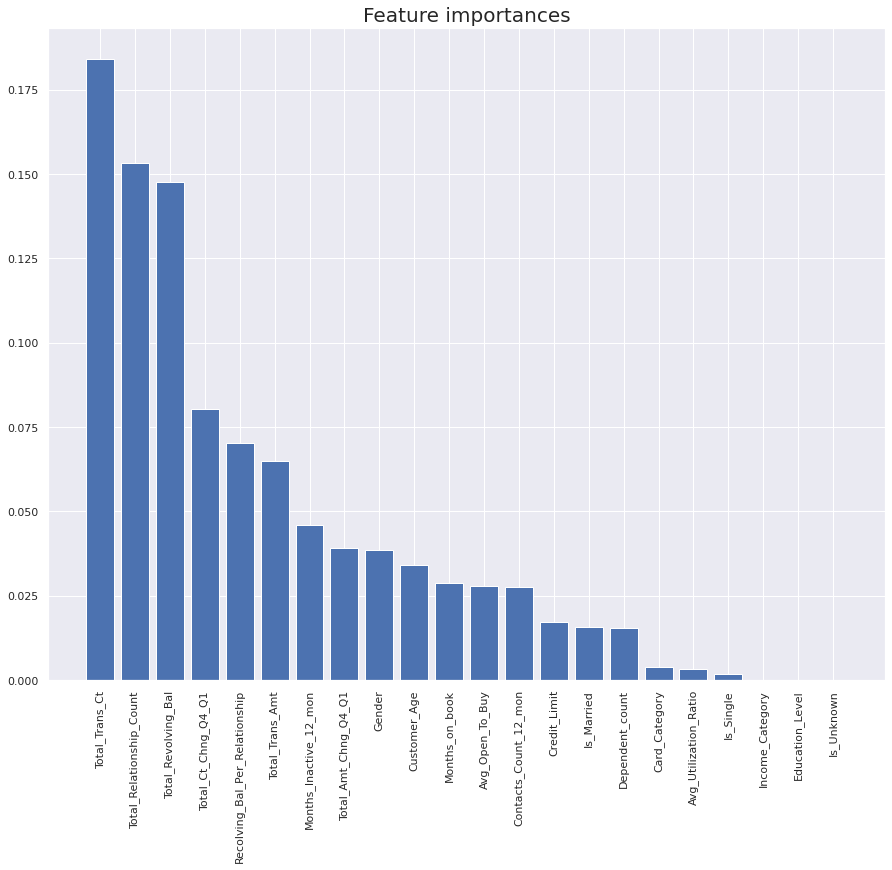

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances', size=20)
plt.xticks(rotation='vertical')
plt.show()

## K-Fold cross validation

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(XGB, X_res, y_res, cv=10,
                         scoring=('accuracy'),
                         return_train_score=True)

print(scores['train_score'])
print(scores['test_score'])




[0.97438525 0.97370219 0.96960383 0.96892077 0.97166268 0.97097986
 0.96995562 0.96893138 0.9771253  0.96927279]
[0.73006135 0.94171779 0.94785276 0.96932515 0.93538462 0.93538462
 0.94769231 0.96615385 0.81846154 0.88923077]


In [ ]:
df_scores_xgb = pd.DataFrame({'train_score':scores['train_score'],'test_score':scores['test_score']})

In [ ]:
df_scores_xgb.head(10)

,train_score,test_score
0,0.974385,0.730061
1,0.973702,0.941718
2,0.969604,0.947853
3,0.968921,0.969325
4,0.971663,0.935385
5,0.970980,0.935385
6,0.969956,0.947692
7,0.968931,0.966154
8,0.977125,0.818462
9,0.969273,0.889231


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


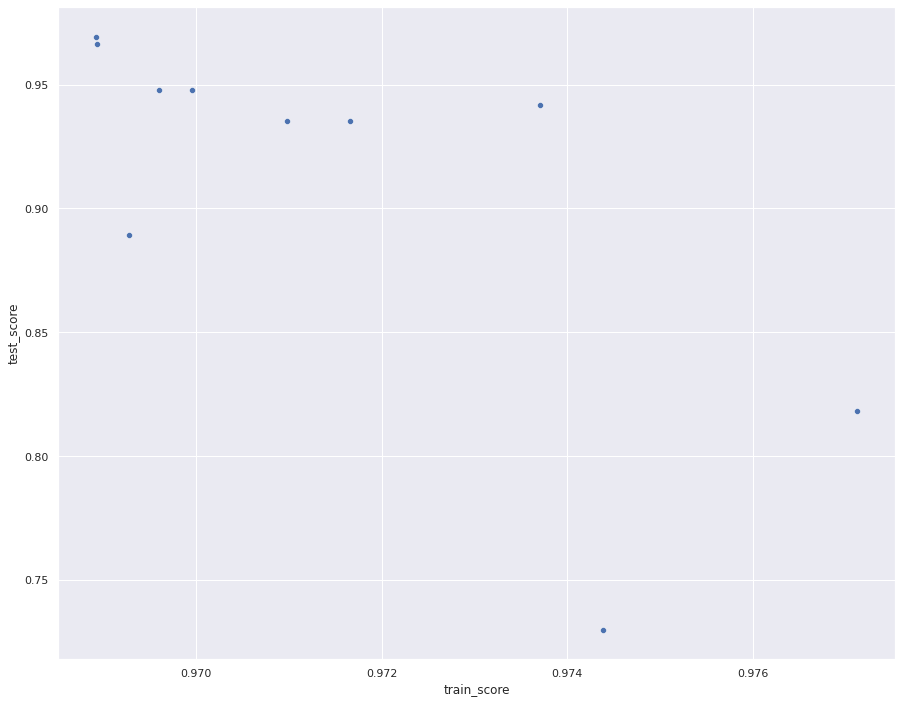

In [ ]:
sns.scatterplot(df_scores_xgb['train_score'],df_scores_xgb['test_score'])

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(XGB, X_res, y_res, scoring="accuracy",cv=10))

[0.73006135 0.94171779 0.94785276 0.96932515 0.93538462 0.93538462
 0.94769231 0.96615385 0.81846154 0.88923077]


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
roc_train_list=[]
roc_test_list=[]
for i in range(1,11):
  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res1, y_res1, test_size=0.3, random_state=22)
  
  XGB = XGBClassifier()
  XGB.fit(X_train_os, y_train_os)
  
  y_pred = XGB.predict(X_test_os)


  y_score_xgb_train = XGB.predict_proba(X_train_os)[:, 1]
  y_score_xgb_test = XGB.predict_proba(X_test_os)[:, 1]


  roc_train=np.round(accuracy_score(y_train_os, y_pred),3)
  roc_train_list.append(roc_train)
  
  roc_test=np.round(accuracy_score(y_test_os, y_pred),3)
  roc_test_list.append(roc_test)

roc_df=pd.DataFrame({"auc_train":roc_train_list,"auc_test":roc_test_list})
roc_df.head(10)


ValueError: ignored

# Dollar Value Evaluation

1- Focusing on your test data only (unseen data), compute the total credit limits of the customers whom your model could correctly predict their churn in the future

2.a- Focusing on your test data only (unseen data), compute the average monthly balance/transactions of the customers whom your model could correctly predict their churn in the future (predicted to be 1 and actually 1)

2.b- Focusing on your test data only (unseen data), compute the average monthly balance/transactions of the customers whom your model cannot correctly predict their churn in the future (predicted to be 0 but actually 1) (edited) 






In [ ]:
X_test.head()

In [ ]:
combine_df=pd.DataFrame({"Y_actual":y_test,"Y_proba":y_pred_proba_XGB,"Dollar_Overall_Trx":X_test["Total_Trans_Amt"]})

In [ ]:
combine_df.head()

In [ ]:
for i in range(1,10):
  step=i/10
  col_name="Y_predict_"+str(step)
  combine_df[col_name]=1*(combine_df['Y_proba']>step)

In [ ]:
combine_df.head()

In [ ]:


Dollar_value_11=[]
Dollar_value_01=[]
Dollar_value_10=[]

for i in range(1,10): 
  pred_name="Y_predict_"+str(i/10)
  Dollar_value_11.append(combine_df.loc[(combine_df['Y_actual']==1) & (combine_df[pred_name]==1),'Dollar_Overall_Trx'].sum())
  Dollar_value_01.append(combine_df.loc[(combine_df['Y_actual']==0) & (combine_df[pred_name]==1),'Dollar_Overall_Trx'].sum())
  Dollar_value_10.append(combine_df.loc[(combine_df['Y_actual']==1) & (combine_df[pred_name]==0),'Dollar_Overall_Trx'].sum())



  

In [ ]:
thresh=[]
for i in range(1,10):
  thresh.append(i/10)
thresh



In [ ]:
th_df=pd.DataFrame({"threshold":thresh,"Dollar_11":Dollar_value_11,"Dollar_10":Dollar_value_10,"Dollar_01":Dollar_value_01})

In [ ]:
th_df

In [ ]:
sns.scatterplot(th_df['threshold'],th_df['Dollar_11'])